In [8]:
import numpy as np
import matplotlib.pyplot as plt
import colour

In [9]:
# Create a mesh grid for the RGB values
n = 60
r, g, b = np.meshgrid(np.linspace(0, 1, n),
                        np.linspace(0, 1, n),
                        np.linspace(0, 1, n))

# Flatten the arrays and combine them into RGB values
r = r.flatten()
g = g.flatten()
b = b.flatten()
colors = np.vstack([r, g, b]).T

In [10]:
def rgb_to_xyz(rgb):
    # Define the transformation matrix from sRGB to XYZ
    M = np.array([[0.4124564, 0.3575761, 0.1804375],
                  [0.2126729, 0.7151522, 0.0721750],
                  [0.0193339, 0.1191920, 0.9503041]])
    
    # Linearize the gamma-corrected RGB values
    mask = rgb <= 0.04045
    rgb[mask] = rgb[mask] / 12.92
    rgb[~mask] = np.power((rgb[~mask] + 0.055) / 1.055, 2.4)

    # Convert to XYZ
    return np.dot(rgb, M.T)

def xyz_to_xy(xyz):
    sum_xyz = np.sum(xyz, axis=1) + 1e-15  # Adding a small constant to avoid division by zero
    x = xyz[:, 0] / sum_xyz
    y = xyz[:, 1] / sum_xyz
    return np.stack((x, y), axis=1)

def rgb_to_cie_xy(rgb_array):
    xyz_array = rgb_to_xyz(rgb_array)
    return xyz_to_xy(xyz_array)

def plot_colored_coordinates(xy_coords, rgb_values, title):
    plt.figure(figsize=(10, 8))
    
    plt.scatter(xy_coords[:, 0], xy_coords[:, 1], c=rgb_values, s=10)
    
    # Set plot limits
    plt.xlim([0, 0.8])
    plt.ylim([0, 0.9])

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

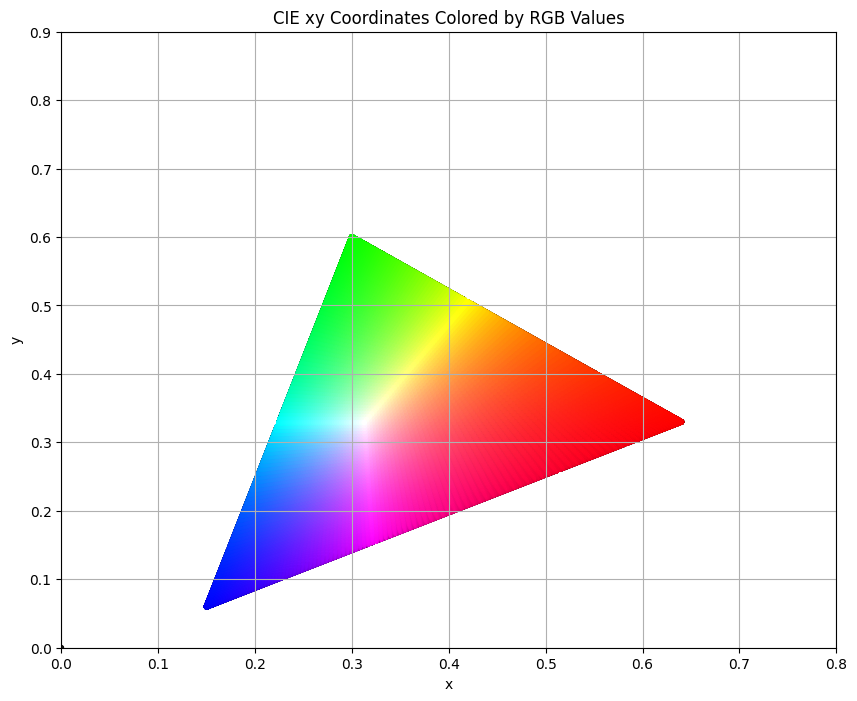

In [11]:
cie_xy_coords = rgb_to_cie_xy(colors)
plot_colored_coordinates(cie_xy_coords, colors, 'CIE xy Coordinates Colored by RGB Values')

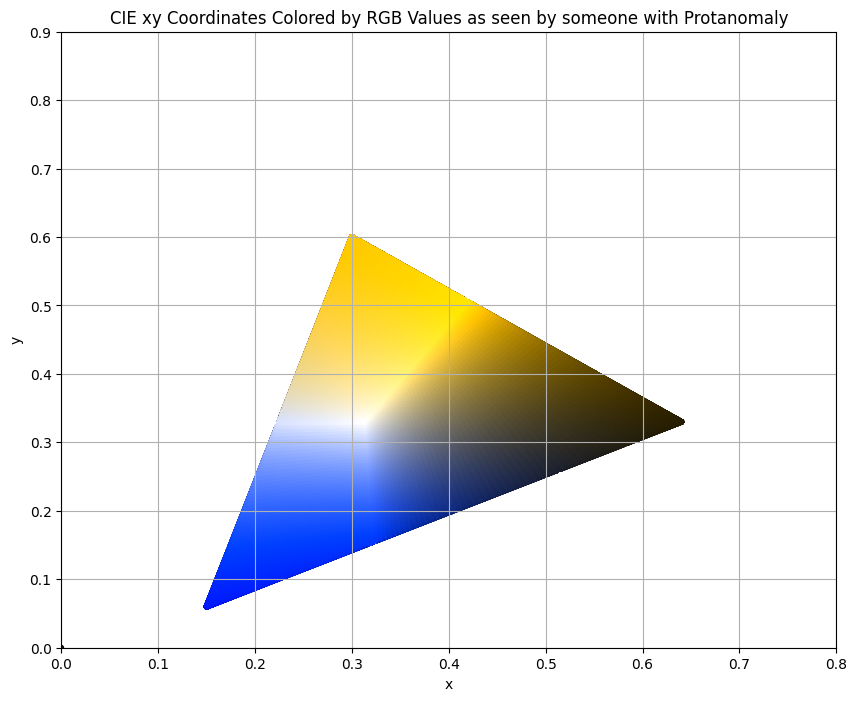

In [12]:
color_vision_deficency = 'Protanomaly'

color_vision_deficency_model = colour.blindness.matrix_cvd_Machado2009(color_vision_deficency, 1)
colors_cvd = colour.algebra.vector_dot(color_vision_deficency_model, colors).clip(0,1)

plot_colored_coordinates(cie_xy_coords, colors_cvd, f'CIE xy Coordinates Colored by RGB Values as seen by someone with {color_vision_deficency}')

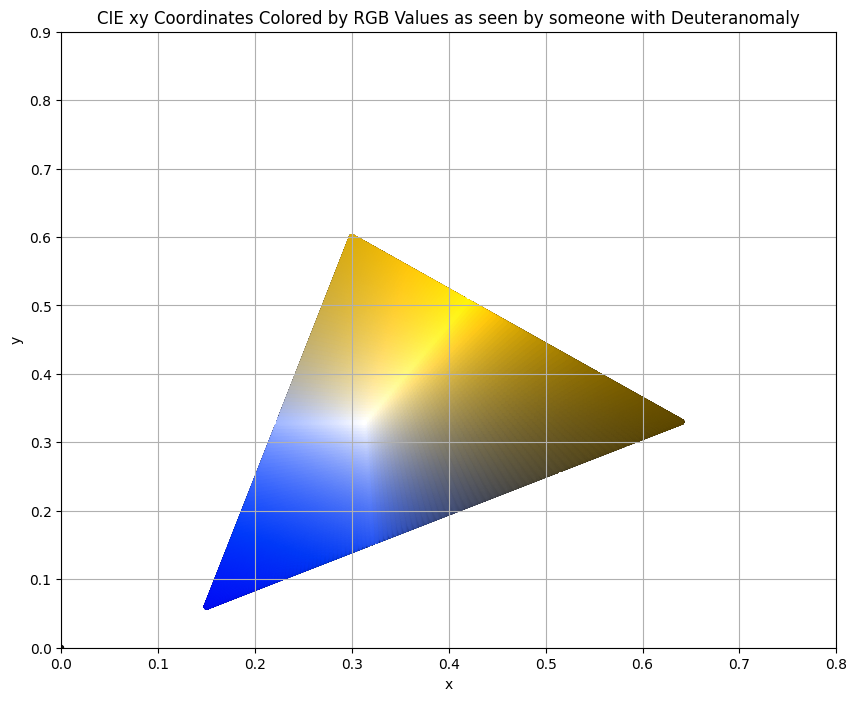

In [13]:
color_vision_deficency = 'Deuteranomaly'

color_vision_deficency_model = colour.blindness.matrix_cvd_Machado2009(color_vision_deficency, 1)
colors_cvd = colour.algebra.vector_dot(color_vision_deficency_model, colors).clip(0,1)

plot_colored_coordinates(cie_xy_coords, colors_cvd, f'CIE xy Coordinates Colored by RGB Values as seen by someone with {color_vision_deficency}')

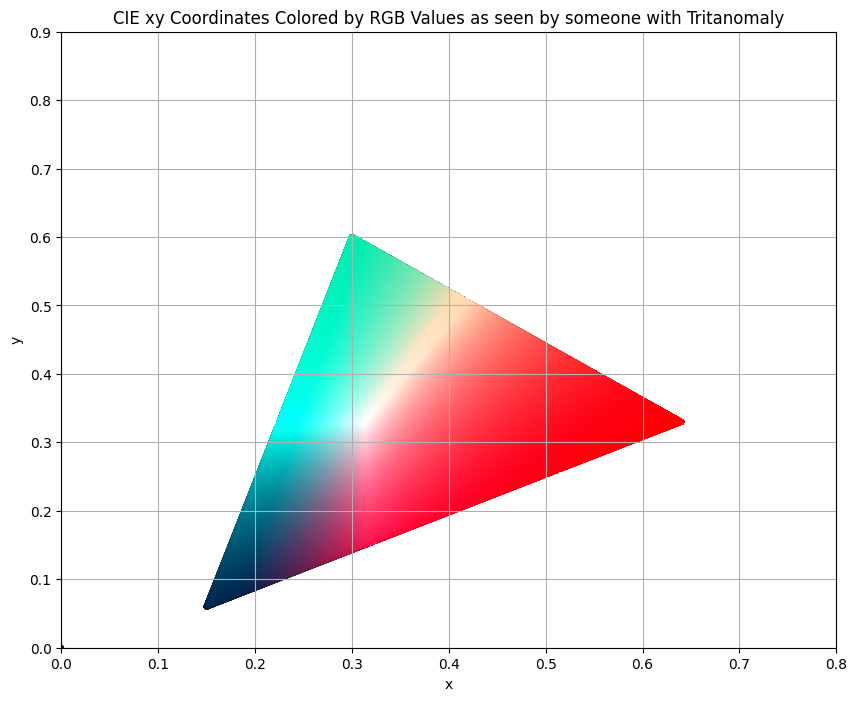

In [14]:
color_vision_deficency = 'Tritanomaly'

color_vision_deficency_model = colour.blindness.matrix_cvd_Machado2009(color_vision_deficency, 1)
colors_cvd = colour.algebra.vector_dot(color_vision_deficency_model, colors).clip(0,1)

plot_colored_coordinates(cie_xy_coords, colors_cvd, f'CIE xy Coordinates Colored by RGB Values as seen by someone with {color_vision_deficency}')